Import Libraries

In [117]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import layers
from google.colab import files
import seaborn as sns

Reading Dataset

In [118]:
uploaded = files.upload()

Saving heart.csv to heart (4).csv


In [119]:
df='heart.csv'

In [120]:
df= pd.read_csv('heart.csv')

In [121]:
df.shape

(303, 14)

In [122]:
df.size

4242

In [123]:
df['target'].value_counts()  #(Number of people with Cardio Vascular Disease (1) and without(0))

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


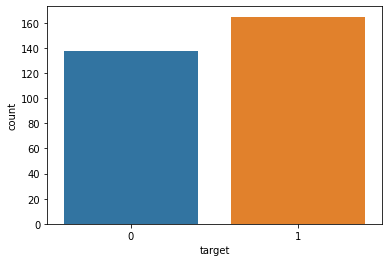

In [124]:
#visualisation of the people with and without CVD)
sns.countplot(df['target'])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [126]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [128]:
df.corr

<bound method DataFrame.corr of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     29    1   1       130   204    0        0      202      0      0.0   
1     34    1   3       118   182    0        0      174      0      0.0   
2     34    0   1       118   210    0        1      192      0      0.7   
3     35    0   0       138   183    0        1      182      0      1.4   
4     35    1   1       122   192    0        1      174      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   71    0   2       110   265    1        0      130      0      0.0   
299   71    0   0       112   149    0        1      125      0      1.6   
300   74    0   1       120   269    0        0      121      1      0.2   
301   76    0   2       140   197    0        2      116      0      1.1   
302   77    1   0       125   304    0        0      162      1      0.0   

     slope  ca  thal  target  
0        2   0     2    

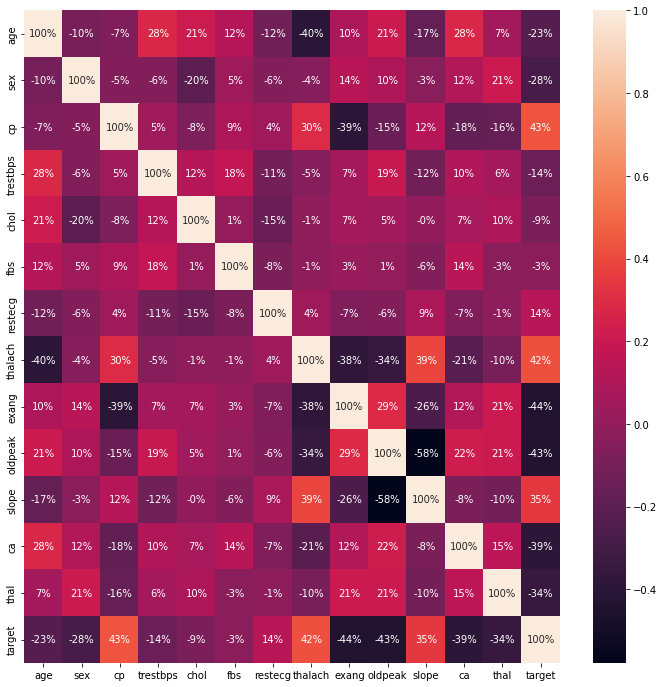

In [129]:
#Visualisation of Correlation between Columns
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True,fmt='.0%')

In [130]:
df=np.array(df)

Splitting Data into Feature Data and Target Data

In [131]:
X=df[:,0:13] # selecting all the columns except target column
target=df[:,13]

Splitting Data again into Training Data(70%) and Testing Data (30%) 

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.3, random_state=1)

In [133]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(303, 13)
(212, 13)
(91, 13)


Feature Scaling

In [134]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [135]:

model=keras.Sequential(name="classifier")
model.add(layers.Dense(12,activation="sigmoid",name="hidden1")) # hidden layer 1
model.add(layers.Dense(8,activation="sigmoid",name="hidden2"))  # hidden layer 2
model.add(layers.Dense(4,activation="sigmoid",name="hidden3"))  # hidden layer 3
model.add(layers.Dense(2,activation="sigmoid",name="hidden4"))  # hidden layer 4
model.add(layers.Dense(1,activation="sigmoid"))                 # Output layer

In [136]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [137]:
history = model.fit(X_train, target_train,validation_data=(X_test,target_test), epochs=1300)


Epoch 1/1300
7/7 [==============================] - 1s 32ms/step - loss: 0.6925 - accuracy: 0.5566 - val_loss: 0.6927 - val_accuracy: 0.5165
Epoch 2/1300
7/7 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5566 - val_loss: 0.6926 - val_accuracy: 0.5165
Epoch 3/1300
7/7 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.5566 - val_loss: 0.6924 - val_accuracy: 0.5165
Epoch 4/1300
7/7 [==============================] - 0s 10ms/step - loss: 0.6906 - accuracy: 0.5566 - val_loss: 0.6923 - val_accuracy: 0.5165
Epoch 5/1300
7/7 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5566 - val_loss: 0.6922 - val_accuracy: 0.5165
Epoch 6/1300
7/7 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.5566 - val_loss: 0.6922 - val_accuracy: 0.5165
Epoch 7/1300
7/7 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.5566 - val_loss: 0.6921 - val_accuracy: 0.5165
Epoch 8/1300
7/7 [

In [138]:
history_dict=history.history

In [139]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [140]:
np.array(history_dict["loss"]).shape

(1300,)

In [141]:
np.array(history_dict["accuracy"]).shape

(1300,)

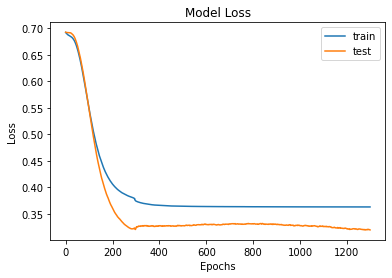

In [142]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

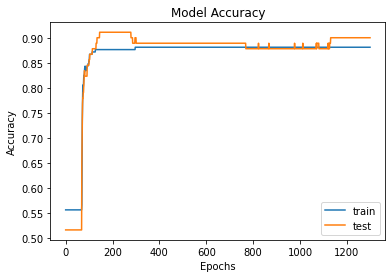

In [143]:
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()




Model Evaluation 
---



In [144]:
#testing Accuracy of the model
print("Accuracy of training data:",model.evaluate(X_train,target_train))
print("Accuracy of testing data:",model.evaluate(X_test,target_test))



7/7 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8821
Accuracy of training data: [0.3627654016017914, 0.8820754885673523]
3/3 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.9011
Accuracy of testing data: [0.31939631700515747, 0.901098906993866]
